Classifying a time series

Start with perhaps the simplest classification technique: averaging across dimensions of a dataset and visually inspecting the result.

We wll use the heartbeat data. Some recordings are normal heartbeat activity, while others are abnormal activity.

In [8]:
import csv
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def convert_txt_to_csv(file_path):
    new_file_name = os.path.splitext(file_path)[0] + '.csv'

    with open(file_path, "r") as f:
        plain_str = f.read()
        print(plain_str[:10], plain_str[-10:])
        csv_data = re.match(r".*?b\'(.*)\'.*?", plain_str).group(1) # remove byte traces
        print(csv_data[:10], csv_data[-10:])
        csv_data = csv_data.replace('\\n', '\n') # remove \\n with actual new line chars

        with open(new_file_name, 'w') as out:
            out.write(csv_data)


files_to_convert = [
                        'abnormal.txt',
                        'normal.txt'
                    ]
for file_path in files_to_convert:
    convert_txt_to_csv(file_path)


b'time,0,1 062869\n'

time,0,1,2 09062869\n
b'time,3,4 4424245\n'
time,3,4,6 44424245\n


In [6]:
# Read in the data
abnormal_df = pd.read_csv('abnormal.csv', index_col=[0])
display(abnormal_df.tail())
print(abnormal_df.info())

# Read in the data
normal_df = pd.read_csv('normal.csv', index_col=[0])
display(normal_df.tail())
print(normal_df.info())

,0,1,2
time,,,
3.997732,0.010513,-0.401539,0.138510
3.998186,0.009675,-0.360107,0.134382
3.998639,0.007957,-0.317170,0.124178
3.999093,0.006445,-0.275164,0.109530
3.999546,0.006529,-0.233864,0.090629


<class 'pandas.core.frame.DataFrame'>
Index: 8820 entries, 0.0 to 3.999546485260771
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8820 non-null   float64
 1   1       8820 non-null   float64
 2   2       8820 non-null   float64
dtypes: float64(3)
memory usage: 275.6 KB
None


,3,4,6
time,,,
3.997732,-0.000089,-0.005931,0.002474
3.998186,-0.000112,-0.004839,0.004467
3.998639,-0.000233,-0.000591,0.016809
3.999093,-0.000103,-0.001320,0.008762
3.999546,-0.000367,0.000652,0.004442


<class 'pandas.core.frame.DataFrame'>
Index: 8820 entries, 0.0 to 3.999546485260771
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   3       8820 non-null   float64
 1   4       8820 non-null   float64
 2   6       8820 non-null   float64
dtypes: float64(3)
memory usage: 275.6 KB
None


In [9]:
normal = normal_df.to_numpy()
print(normal.shape)

abnormal = abnormal_df.to_numpy()
print(abnormal.shape)

sfreq = 2205

# import inspect
# source = inspect.getsource(show_plot_and_make_titles)
# print(source)

def show_plot_and_make_titles():
   axs[0, 0].set(title="Normal Heartbeats")
   axs[0, 1].set(title="Abnormal Heartbeats")
   plt.tight_layout()
   plt.show()

(8820, 3)
(8820, 3)


In [10]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['figure.figsize'] = (30, 15)

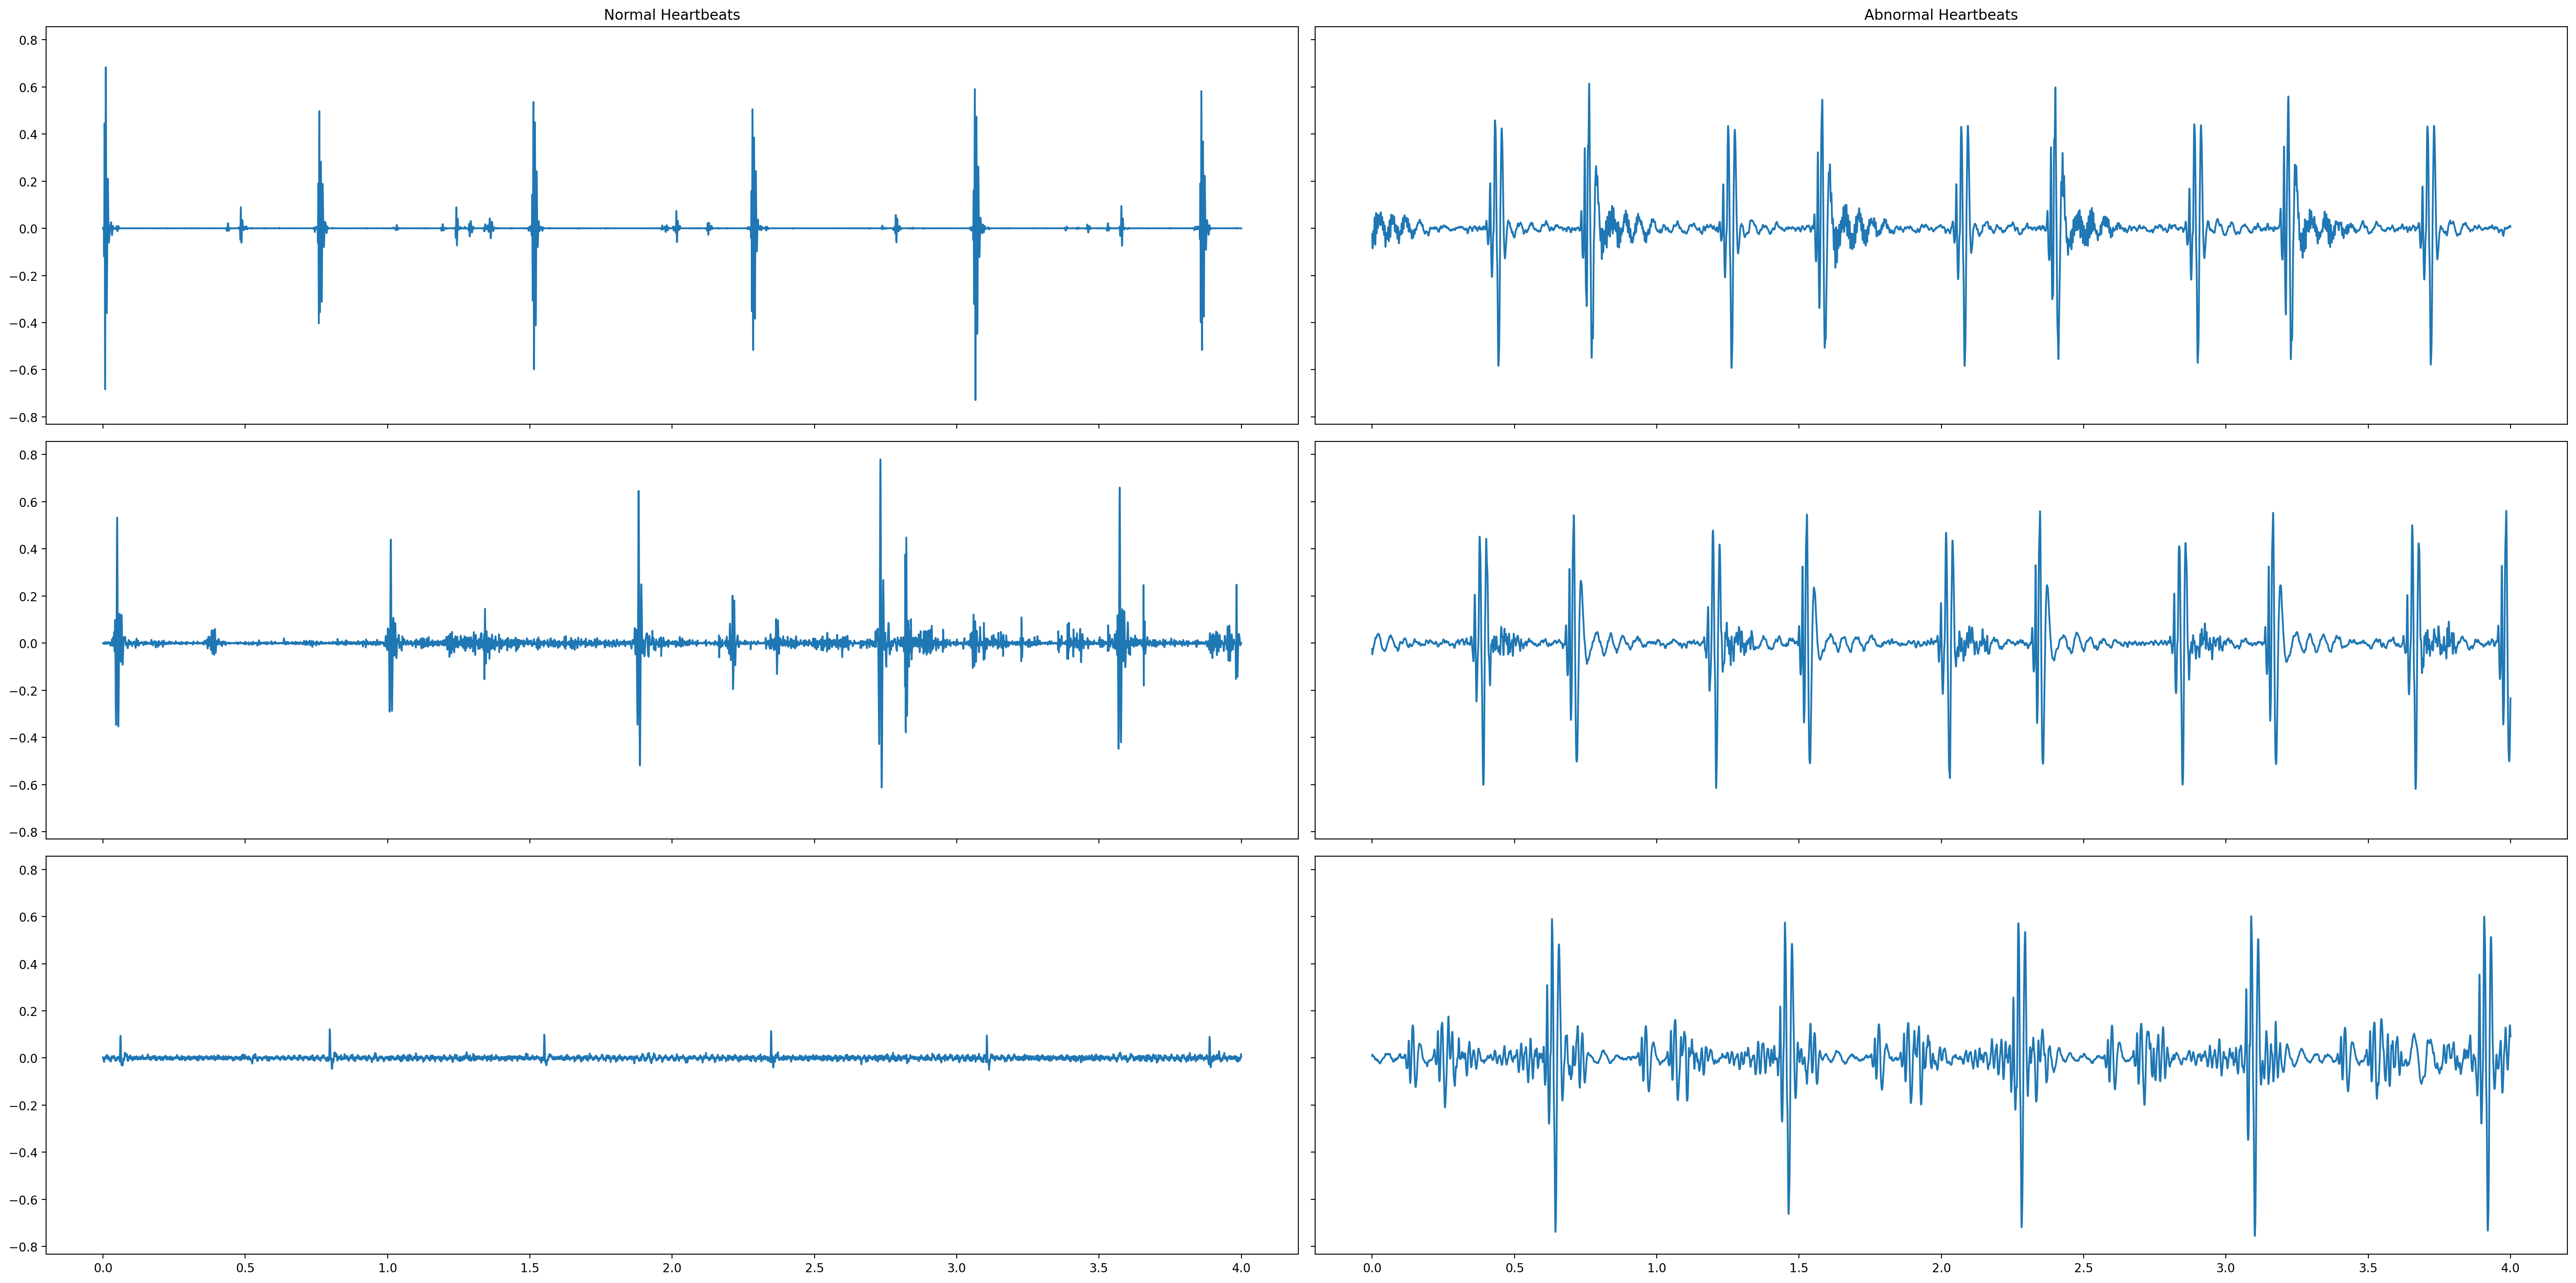

In [11]:
fig, axs = plt.subplots(3, 2, figsize=(30, 15), sharex=True, sharey=True)

# Calculate the time array
time = np.arange(normal.shape[0]) / sfreq

# Stack the normal/abnormal audio so you can loop and plot
stacked_audio = np.hstack([normal, abnormal]).T

# Loop through each audio file / ax object and plot
# .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)

show_plot_and_make_titles()

As you can see there is a lot of variability in the raw data, let's see if you can average out some of that noise to notice a difference.

 Data is usually noisy or exhibits complex patterns that aren't discoverable by the naked eye. Lets visualize it

In [12]:
files_to_convert = [
                        'invariance_abnormal.txt',
                        'invariance_normal.txt'
                    ]
for file_path in files_to_convert:
    convert_txt_to_csv(file_path)

b'time,0,1 657\n' 



time,0,1,2 27398657\n
b'time,3,4 68237\n' 

time,3,4,6 05768237\n


In [14]:
normal   = pd.read_csv('invariance_normal.csv', index_col=[0])
abnormal = pd.read_csv('invariance_abnormal.csv', index_col=[0])

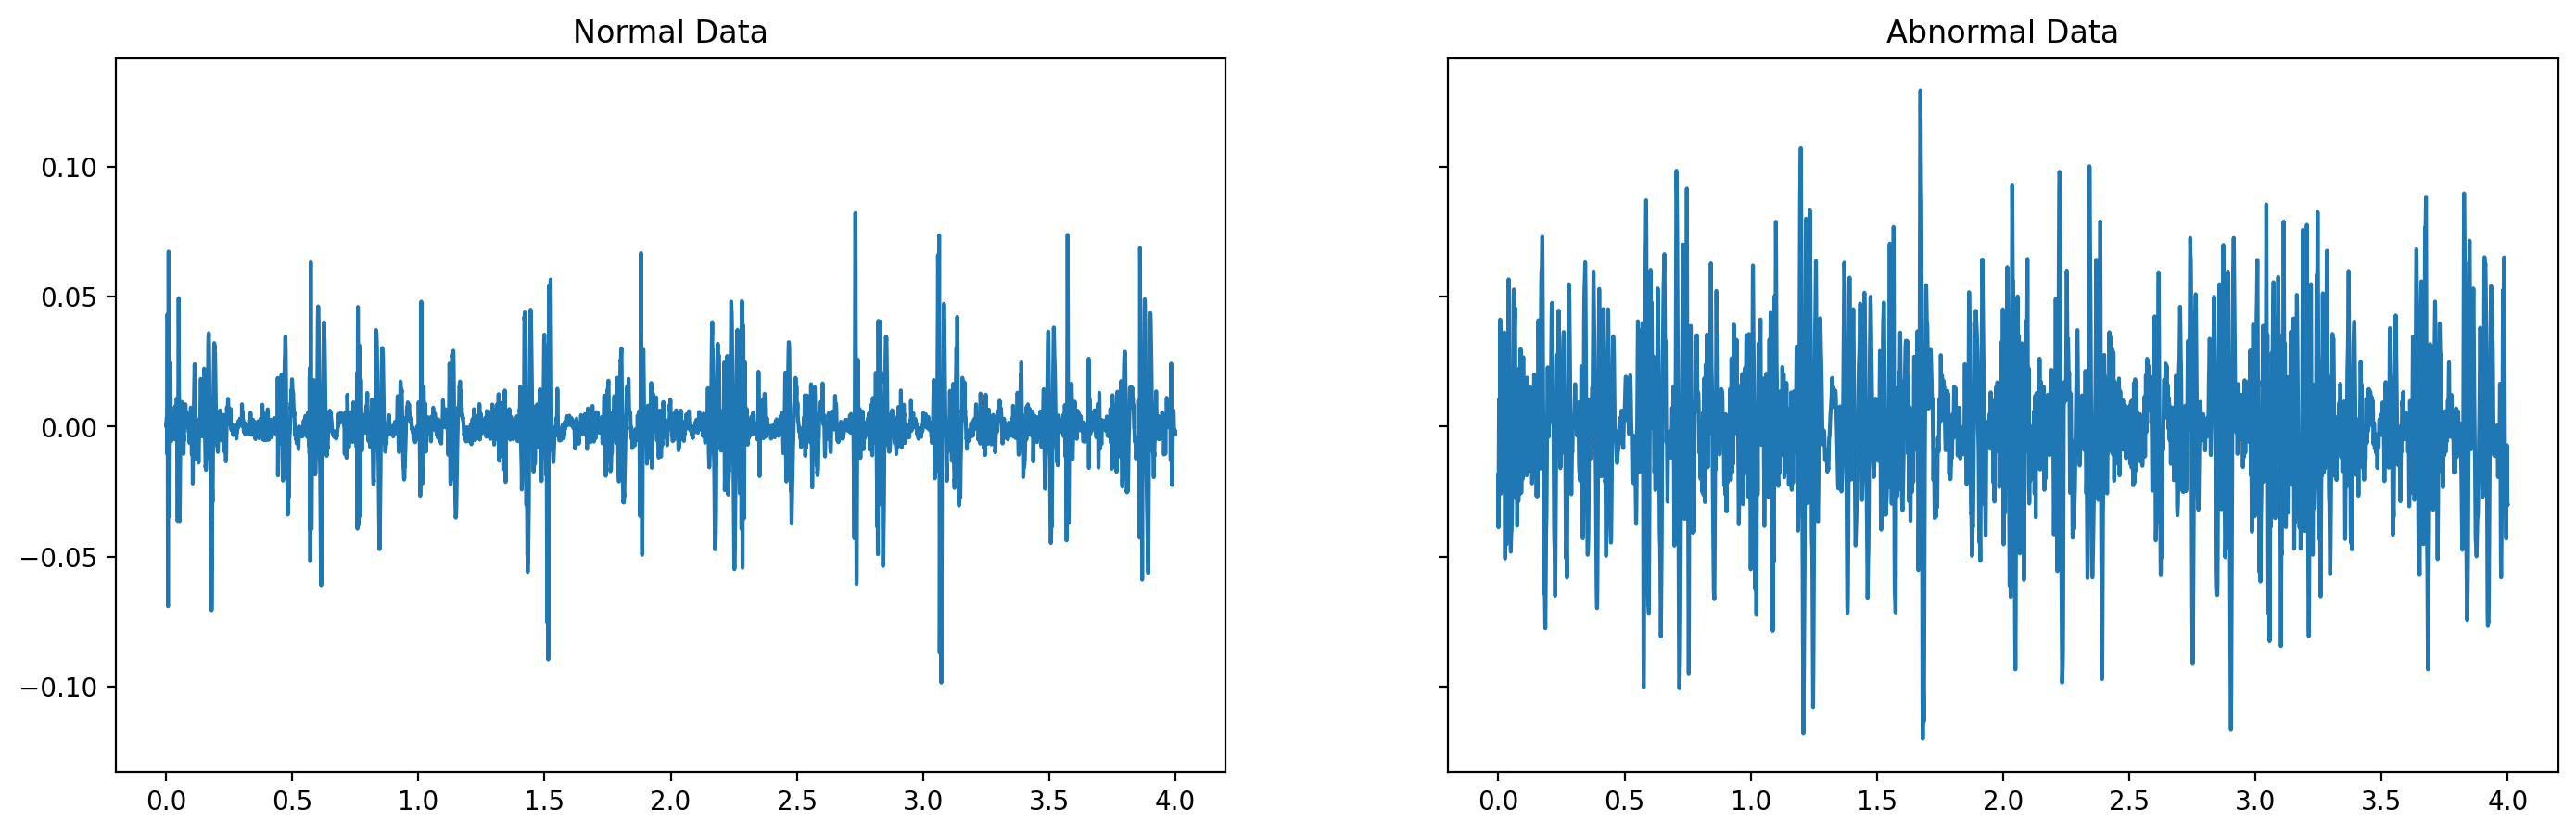

In [15]:
# Average across the audio files of each DataFrame
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)

# Plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5), sharey=True)
ax1.plot(time, mean_normal)
ax1.set(title="Normal Data")
ax2.plot(time, mean_abnormal)
ax2.set(title="Abnormal Data")

plt.show()

A noticeable difference between the two

 Use each repetition as a datapoint, and each moment in time as a feature to fit a classifier that attempts to predict abnormal vs. normal heartbeats using only the raw data.

In [16]:
files_to_convert = [    'abnormal_full.txt',
                        'normal_full.txt'    ]
for file_path in files_to_convert:
    convert_txt_to_csv(file_path)


normal   = pd.read_csv('normal_full.csv', index_col=0).select_dtypes(np.float64).astype(np.float32)
abnormal = pd.read_csv('abnormal_full.csv', index_col=0).select_dtypes(np.float64).astype(np.float32)

display(normal.head())
display(abnormal.head())
print(normal.shape)
print(abnormal.shape)

b'time,0,1 6235\n' 


time,0,1,2 54446235\n
b'time,3,4 7695\n' 


time,3,4,6 01697695\n


,3,4,6,7,10,12,15,16,17,18,...,34,38,39,40,43,48,49,51,52,55
time,,,,,,,,,,,,,,,,,,,,,
0.000000,-0.000995,0.000281,0.002953,0.005497,0.000433,0.001316,-0.001694,0.000211,0.000042,0.001092,...,0.023688,0.000369,0.000026,0.002742,0.000618,-0.007847,-0.003252,0.008799,-0.361737,-0.001609
0.000454,-0.003381,0.000381,0.003034,0.010088,0.000554,-0.000154,-0.002157,-0.001945,-0.000146,-0.005554,...,0.046644,0.000980,-0.000063,0.002161,0.000476,-0.018061,0.007291,0.017107,-0.651842,-0.004319
0.000907,-0.000948,0.000063,0.000292,0.008272,0.000232,-0.001945,0.000619,0.006148,0.000048,-0.001297,...,0.039666,0.000765,-0.000043,0.001553,-0.000024,-0.017164,0.016447,0.015018,-0.365683,0.000573
0.001361,-0.000766,0.000026,-0.005916,0.009358,0.000538,-0.001429,0.002182,-0.000340,0.001091,-0.002012,...,0.046120,0.000638,-0.000009,0.004452,0.000007,-0.015996,0.018959,0.017465,-0.173468,-0.001807
0.001814,0.000469,-0.000432,-0.005307,0.009418,0.001081,-0.002623,0.004176,-0.003359,-0.000170,0.001939,...,0.041412,0.000054,-0.000215,-0.002014,-0.000658,-0.010558,0.020568,0.018050,0.141141,-0.007140


,0,1,2,5,8,9,11,13,14,19,...,45,46,47,50,53,54,56,57,58,59
time,,,,,,,,,,,,,,,,,,,,,
0.000000,-0.024684,-0.024507,0.008254,-0.030747,-0.000950,0.013836,0.000441,-0.006831,-0.118929,-0.000390,...,0.011269,-0.131191,-0.079911,0.073388,-0.000501,0.025458,-0.005471,-0.003371,-0.003332,-0.005799
0.000454,-0.060429,-0.047736,0.014809,-0.060250,-0.003243,0.036587,0.002488,-0.013365,-0.255299,-0.000819,...,0.021004,-0.260868,-0.162169,0.150714,-0.004710,0.053362,-0.011112,-0.004309,-0.007769,-0.010838
0.000907,-0.070080,-0.039938,0.010475,-0.047856,-0.004097,0.044119,0.000105,-0.011221,-0.186055,-0.001218,...,0.017402,-0.224483,-0.143243,0.129426,-0.007257,0.050708,-0.009940,-0.001084,-0.008644,-0.007528
0.001361,-0.084212,-0.041199,0.010272,-0.048017,-0.004431,0.053670,0.001550,-0.011952,-0.097866,-0.001315,...,0.019285,-0.238368,-0.153451,0.137134,-0.005510,0.052555,-0.011539,-0.000613,-0.010337,-0.008523
0.001814,-0.085111,-0.036050,0.008580,-0.040114,-0.003582,0.060088,0.001222,-0.011607,0.038730,-0.002458,...,0.017182,-0.215284,-0.142139,0.125747,-0.000892,0.046691,-0.012783,0.000383,-0.011342,-0.008434


(8820, 29)
(8820, 31)


In [17]:
stacked_audio = np.hstack([normal, abnormal]).T
X = stacked_audio
X.shape

(60, 8820)

In [18]:
y = np.concatenate((np.full((len(normal.T), 1), 'normal'), np.full((len(abnormal.T), 1), 'abnormal')))
y.shape

(60, 1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(type(X), X[:2],X.shape)
print(type(y),y[:2], y.shape)

<class 'numpy.ndarray'> [[-9.9521899e-04 -3.3807522e-03 -9.4784319e-04 ... -2.3299057e-04
  -1.0334120e-04 -3.6749945e-04]
 [ 2.8075944e-04  3.8078491e-04  6.2566738e-05 ... -5.9091963e-04
  -1.3196187e-03  6.5185985e-04]] (60, 8820)
<class 'numpy.ndarray'> [['normal']
 ['normal']] (60, 1)


In [20]:
len(y_test)

18

In [21]:
from sklearn.svm import LinearSVC

# Initialize and fit the model
model = LinearSVC()
model.fit(X_train,y_train)

# Generate predictions and score them manually
predictions = model.predict(X_test)
print(sum(predictions == y_test.squeeze()) / len(y_test))

0.6111111111111112


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Predictions didn't do so well. That's because the features we are using as inputs to the model (raw data) aren't very good at differentiating classes. Next, we will explore how to calculate some more complex features that may improve the results.

One of the ways you can improve the features available to your model is to remove some of the noise present in the data. In audio data, a common way to do this is to smooth the data and then rectify it so that the total amount of sound energy over time is more distinguishable.

In [22]:
import h5py

path = 'audio_munged.hdf5'
f = h5py.File(path,'r')
list(f.keys())

['h5io']

In [23]:
f['h5io'].keys()

<KeysViewHDF5 ['key_data', 'key_meta', 'key_sfreq']>

In [24]:
sfreq = f['h5io']['key_sfreq'][0] # 2205

In [25]:
key_data = pd.read_hdf(path, key='h5io/key_data')
audio = key_data.squeeze()
display(audio.shape)

(8820, 60)

In [26]:
key_meta = pd.read_hdf(path, key='h5io/key_meta')
display(key_meta.head())
display(key_meta.info())
labels = key_meta["label"].to_numpy()
labels

,dataset,fname,label,sublabel,set,length
0,a,murmur__201108222226.wav,murmur,NaN,train,7.935601
1,a,murmur__201108222246.wav,murmur,NaN,train,7.935601
2,a,murmur__201108222258.wav,murmur,NaN,train,7.935601
3,a,normal__201103170121.wav,normal,NaN,train,8.030839
4,a,normal__201103140822.wav,normal,NaN,train,8.014059


<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dataset   60 non-null     object 
 1   fname     60 non-null     object 
 2   label     60 non-null     object 
 3   sublabel  0 non-null      float64
 4   set       60 non-null     object 
 5   length    60 non-null     float64
dtypes: float64(2), object(4)
memory usage: 3.3+ KB


None

array(['murmur', 'murmur', 'murmur', 'normal', 'normal', 'murmur',
       'normal', 'normal', 'murmur', 'murmur', 'normal', 'murmur',
       'normal', 'murmur', 'murmur', 'normal', 'normal', 'normal',
       'normal', 'murmur', 'normal', 'normal', 'murmur', 'murmur',
       'normal', 'normal', 'normal', 'normal', 'murmur', 'murmur',
       'murmur', 'normal', 'normal', 'normal', 'normal', 'murmur',
       'murmur', 'murmur', 'normal', 'normal', 'normal', 'murmur',
       'murmur', 'normal', 'murmur', 'murmur', 'murmur', 'murmur',
       'normal', 'normal', 'murmur', 'normal', 'normal', 'murmur',
       'murmur', 'normal', 'murmur', 'murmur', 'murmur', 'murmur'],
      dtype=object)

In [27]:
audio = pd.read_csv('audio.csv', index_col=0)

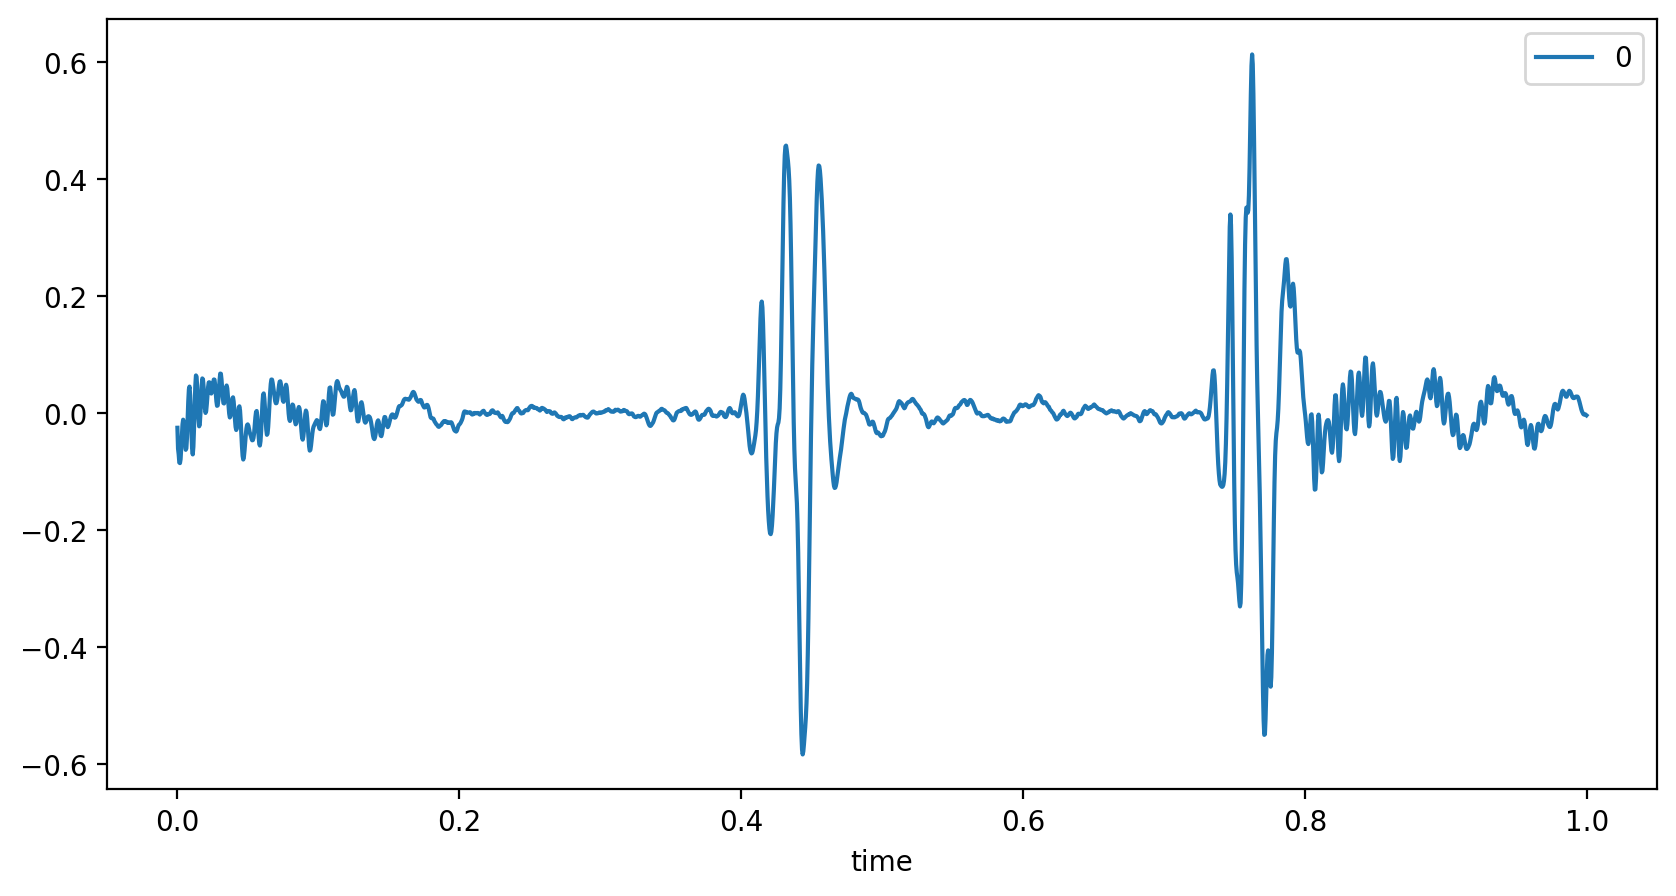

In [28]:
# Plot the raw data first
audio.plot(figsize=(10, 5))
plt.show()

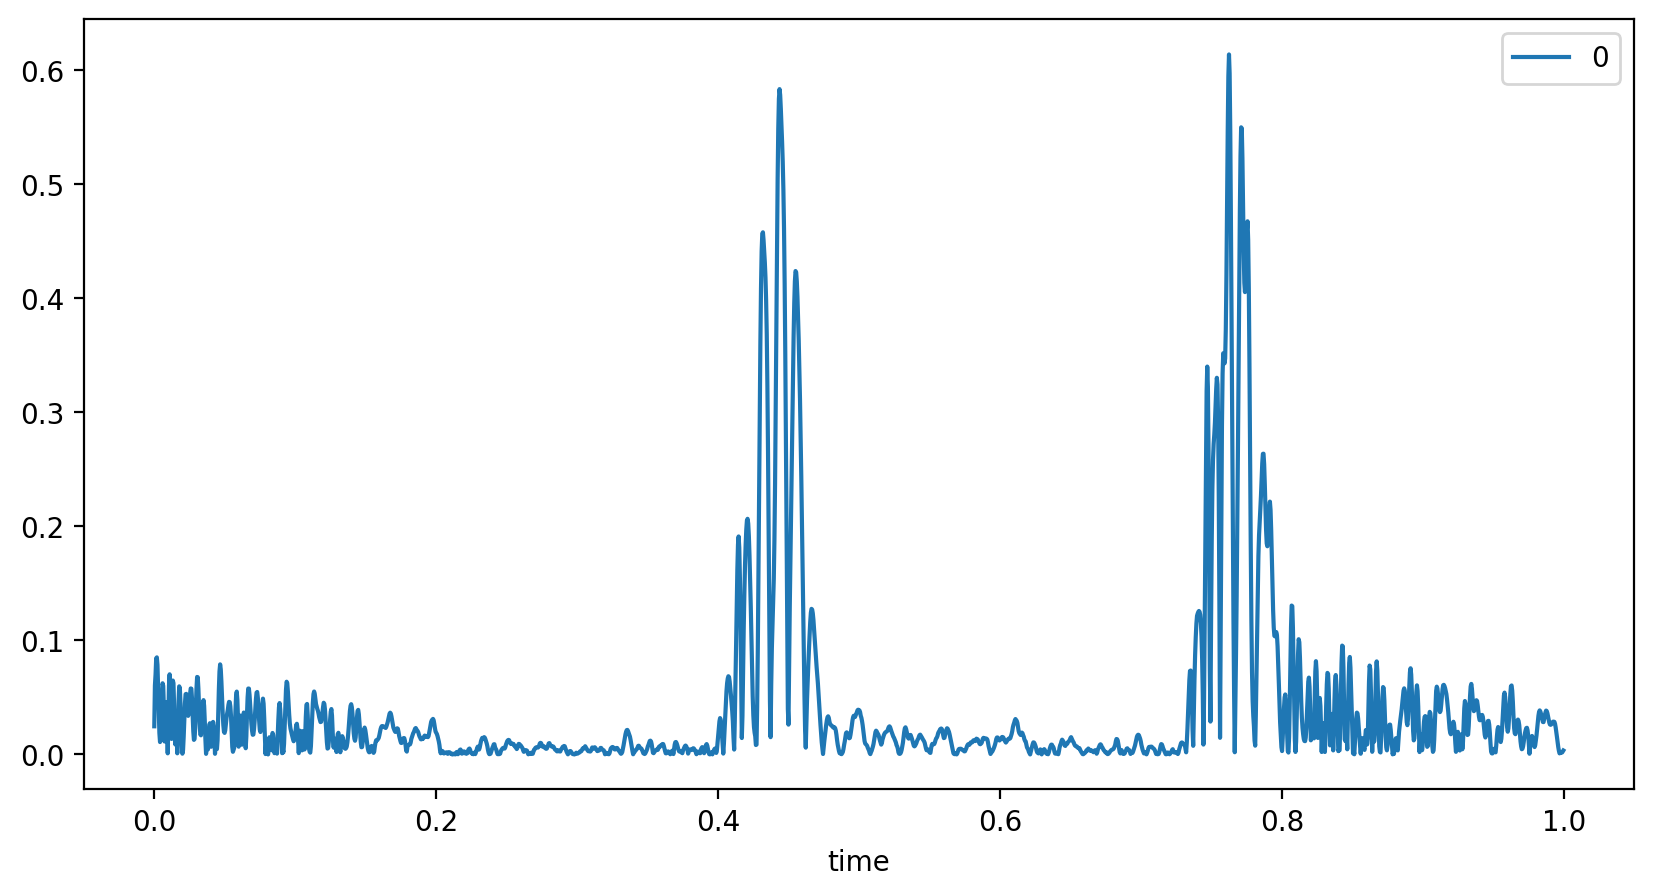

In [29]:
# Rectify the audio signal
audio_rectified = audio.apply(np.abs)

# Plot the result
audio_rectified.plot(figsize=(10, 5))
plt.show()

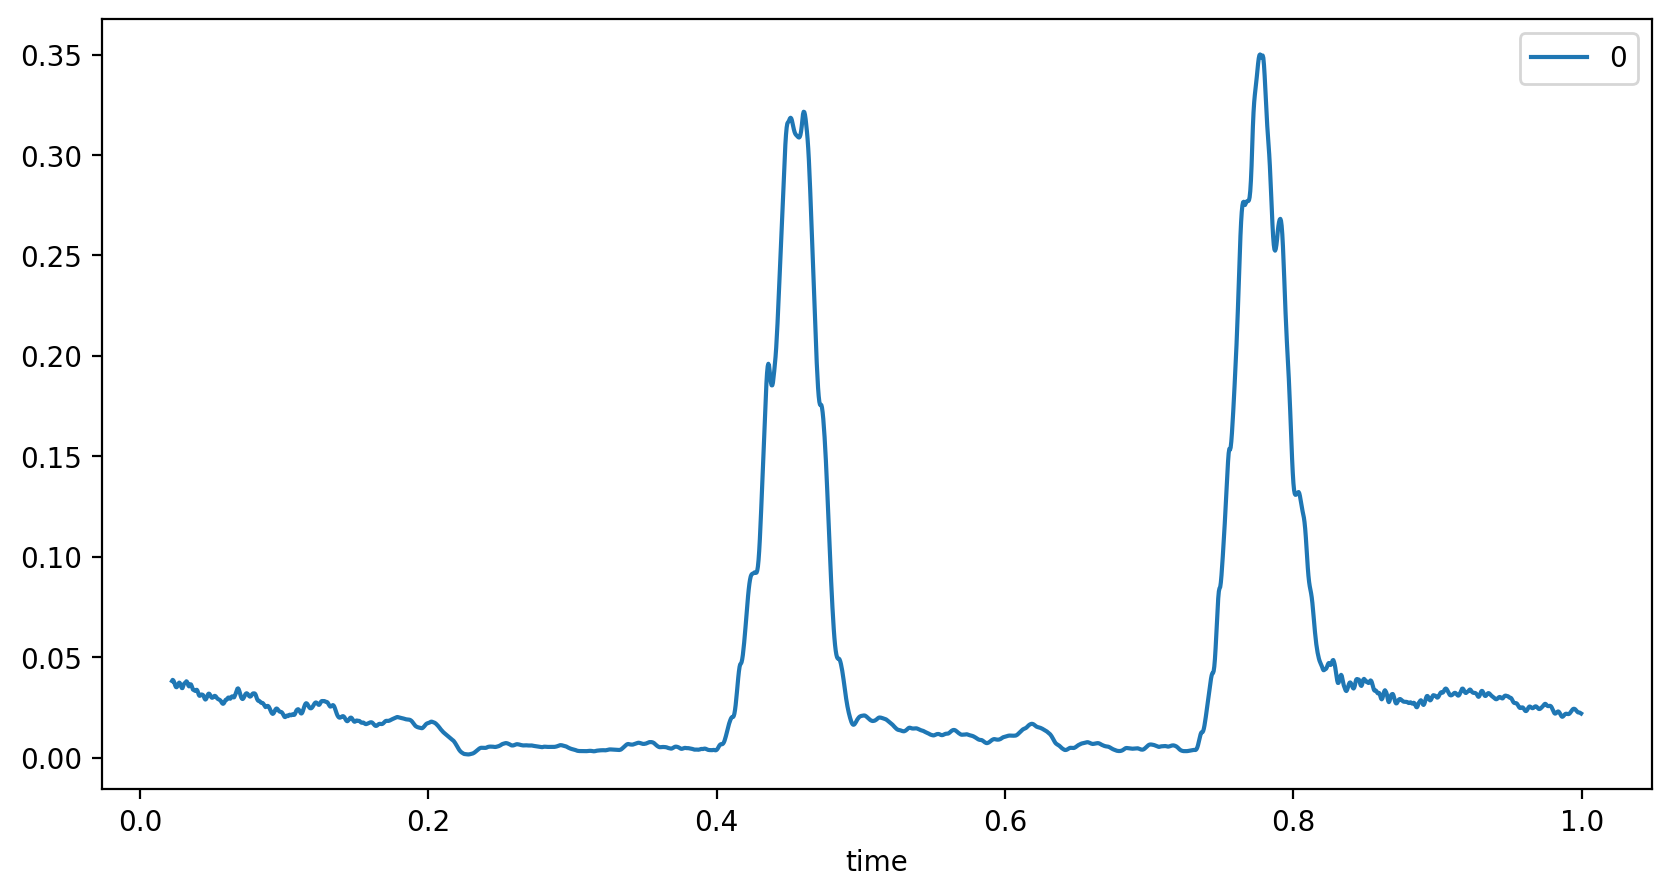

In [30]:
# Smooth by applying a rolling mean
audio_rectified_smooth = audio_rectified.rolling(50).mean()

# Plot the result
audio_rectified_smooth.plot(figsize=(10, 5))
plt.show()

By calculating the envelope of each sound and smoothing it, we eliminated much of the noise and have a cleaner signal to tell us when a heartbeat is happening.

Now that we've removed some of the noisier fluctuations in the audio, let's see if this improves your ability to classify.

In [31]:
# prepare data for the exercise
path = 'audio_munged.hdf5'
df = pd.read_hdf(path, key='h5io/key_data')
audio = df.squeeze()
# Smooth by applying a rolling mean
audio_rectified = audio.apply(np.abs)
audio_rectified_smooth = audio_rectified.rolling(50).mean()
audio_rectified_smooth

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
time,,,,,,,,,,,,,,,,,,,,,
0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.001361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.001814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.997732,0.004950,0.346406,0.058549,0.000319,0.052274,0.022528,0.004678,0.009189,0.005235,0.017860,...,0.038664,0.020346,0.021820,0.016904,0.022293,0.040190,0.013043,0.001105,0.017127,0.016632
3.998186,0.004578,0.347291,0.060633,0.000316,0.052350,0.022081,0.004708,0.009258,0.005331,0.018351,...,0.037305,0.019737,0.022072,0.017210,0.021217,0.039393,0.012920,0.001104,0.017448,0.016551
3.998639,0.004237,0.347701,0.062873,0.000319,0.052310,0.021707,0.005010,0.009341,0.005451,0.019325,...,0.035876,0.019177,0.022175,0.017372,0.020081,0.038636,0.012806,0.001108,0.017796,0.016419


In [32]:
model = LinearSVC()

In [33]:
# Calculate stats
means = np.mean(audio_rectified_smooth, axis=0)
stds = np.std(audio_rectified_smooth, axis=0)
maxs = np.max(audio_rectified_smooth, axis=0)

# Create the X and y arrays
X = np.column_stack([means, stds, maxs])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
from sklearn.model_selection import cross_val_score
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

0.7166666666666667


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

This model is both simpler (only 3 features) and more understandable (features are simple summary statistics of the data)

One benefit of cleaning up your data is that it lets us compute more sophisticated features

In [34]:
model = LinearSVC()

In [39]:
import librosa as lr

# Calculate the tempo of the sounds
tempos = []
for col, i_audio in audio.items():
    try:
        tempo, _ = lr.beat.beat_track(y=i_audio.values, sr=sfreq, hop_length=2**6)
        tempos.append(tempo)
    except ValueError as e:
        if "Tempo estimation requires non-silent audio" in str(e):
            print(f"Warning: Silent audio clip encountered at column {col}. Assigning tempo as 0.")
            tempos.append(0)
        else:
            raise e


# Convert the list to an array so you can manipulate it more easily
tempos = np.array(tempos)

# Calculate statistics of each tempo
tempos_mean = tempos.mean(axis=-1)
tempos_std = tempos.std(axis=-1)
tempos_max = tempos.max(axis=-1)

In [40]:
# Create the X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_std, tempos_max])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

0.7166666666666667


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

 Predictive power may not have gone up (because this dataset is quite small), but you now have a more rich feature representation of audio

Spectral engineering is one of the most common techniques in machine learning for time series data. The first step in this process is to calculate a spectrogram of sound.

In [41]:
key_data = pd.read_hdf(path, key='h5io/key_data')
audio = key_data.iloc[:, 0].to_numpy()
print(type(audio), audio.shape)
audio

<class 'numpy.ndarray'> (8820,)


array([-0.02468447, -0.06042899, -0.07008006, ...,  0.00795731,
        0.00644498,  0.00652934], dtype=float32)

In [42]:
time = key_data.index.to_numpy()
time.shape

(8820,)

In [43]:
# Import the stft function
from librosa.core import stft

# Prepare the STFT
HOP_LENGTH = 2**4
SIZE_WINDOW = 2**7

spec = stft(audio, hop_length=HOP_LENGTH, n_fft= SIZE_WINDOW)

In [44]:
spec

array([[-5.78795969e-01+0.0000000e+00j, -1.97362378e-01+0.0000000e+00j,
         5.40734529e-01+0.0000000e+00j, ...,
        -2.82254845e-01+0.0000000e+00j, -5.06783836e-02+0.0000000e+00j,
         8.50139186e-02+0.0000000e+00j],
       [ 7.55336702e-01-8.9667223e-02j,  6.12887740e-01+7.7025163e-01j,
        -3.08458120e-01+1.1947838e+00j, ...,
         1.19367287e-01+3.6285260e-01j, -1.24381974e-01+2.0790760e-01j,
        -1.37131587e-01-3.5407746e-03j],
       [-6.17729366e-01+4.9789852e-01j, -7.27054954e-01-5.5708194e-01j,
         1.83063820e-01-7.7301598e-01j, ...,
         8.54593888e-02-2.5345534e-01j,  1.74702987e-01-3.0492203e-02j,
         8.89286324e-02+7.3707484e-02j],
       ...,
       [ 8.04264192e-03+1.6446107e-03j,  1.02397334e-03-7.3429542e-03j,
        -4.65709018e-03-2.3678715e-04j, ...,
         1.28283282e-03+4.2327333e-04j,  8.83886416e-04-2.4727187e-03j,
        -3.15429247e-03-1.1423643e-03j],
       [-7.29469396e-03-5.8842439e-04j, -4.77909762e-03+4.3596318e-0

In [45]:
# We need to downsampling the timestamp by aggregating the list with HOP_LENGTH of 16
times_spec = time[::HOP_LENGTH]

/tmp/ipython-input-2583661737.py:5: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spec_db = amplitude_to_db(spec)


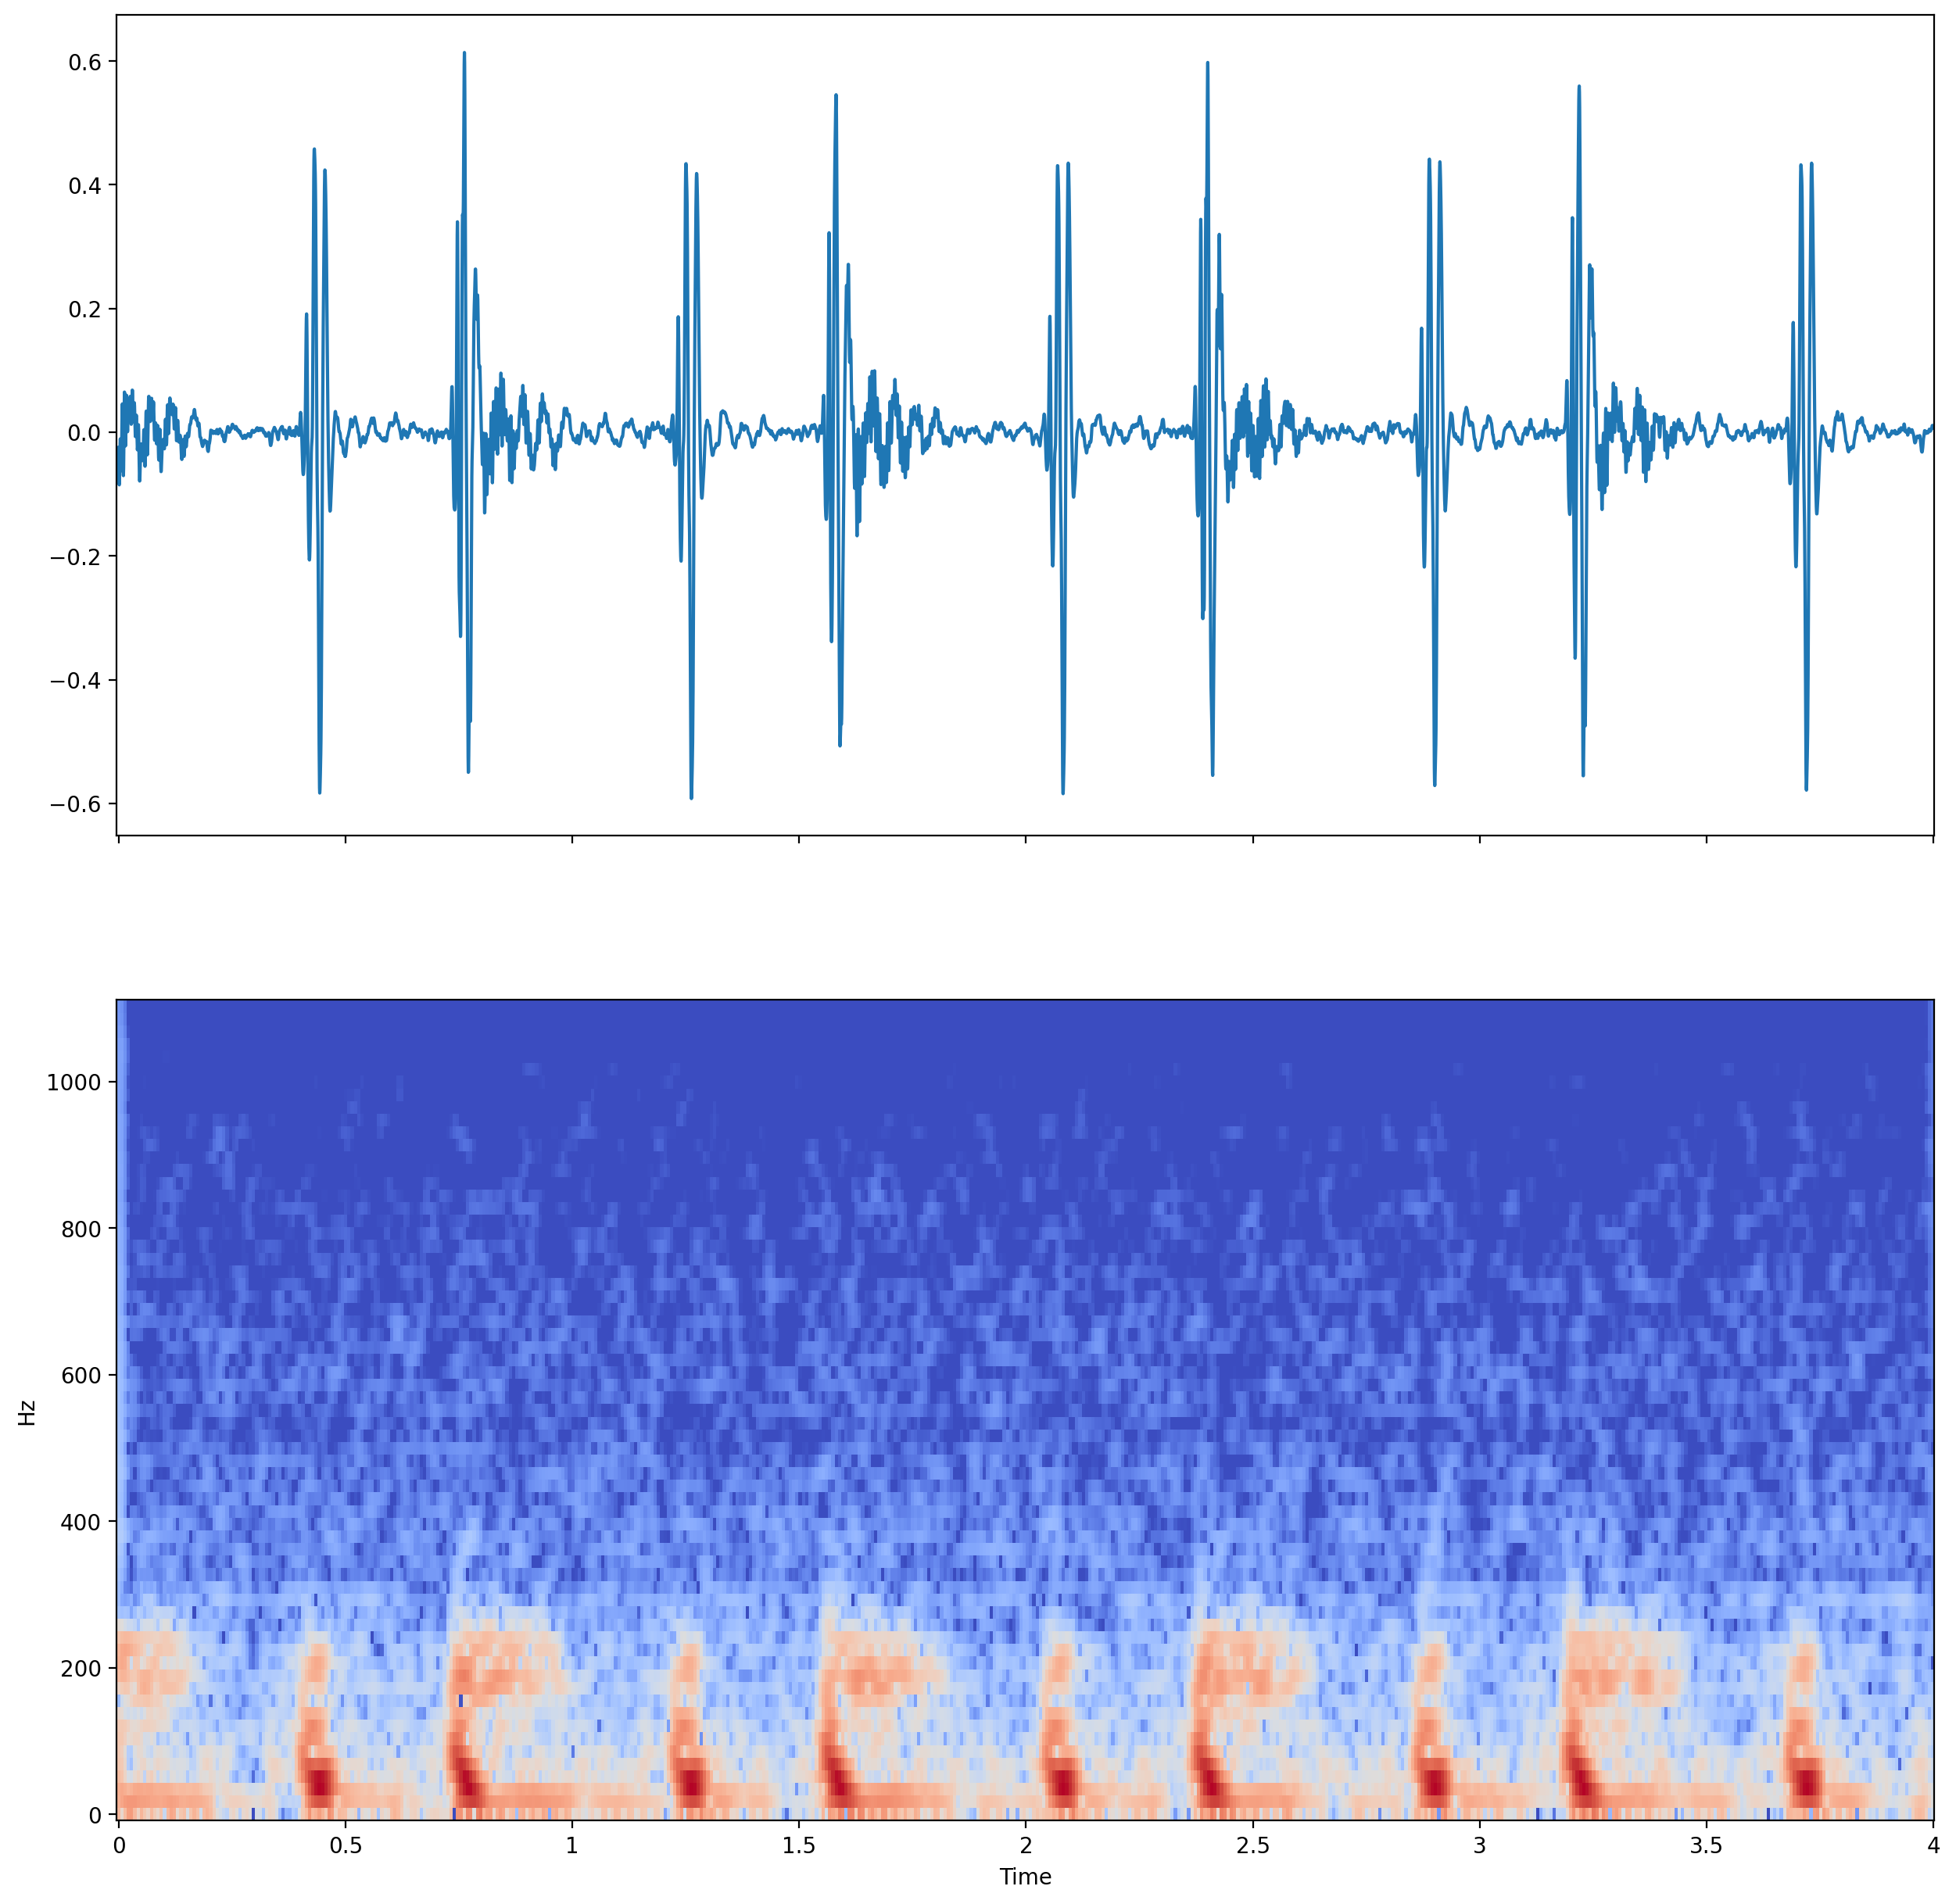

In [46]:
from librosa.core import amplitude_to_db
from librosa.display import specshow

# Convert into decibels
spec_db = amplitude_to_db(spec)

# Compare the raw audio to the spectrogram of the audio
fig, axs = plt.subplots(2, 1, figsize=(15, 15), sharex=True)
axs[0].plot(time, audio)
specshow(spec_db, sr=sfreq, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
plt.show()


Notice that the heartbeats come in pairs, as seen by the vertical lines in the spectrogram

 there is a lot more information in a spectrogram compared to a raw audio file. By computing the spectral features, you have a much better idea of what's going on.

In [47]:
spec = np.absolute(spec.astype(np.float32))
spec

/tmp/ipython-input-1610142072.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  spec = np.absolute(spec.astype(np.float32))


array([[5.78795969e-01, 1.97362378e-01, 5.40734529e-01, ...,
        2.82254845e-01, 5.06783836e-02, 8.50139186e-02],
       [7.55336702e-01, 6.12887740e-01, 3.08458120e-01, ...,
        1.19367287e-01, 1.24381974e-01, 1.37131587e-01],
       [6.17729366e-01, 7.27054954e-01, 1.83063820e-01, ...,
        8.54593888e-02, 1.74702987e-01, 8.89286324e-02],
       ...,
       [8.04264192e-03, 1.02397334e-03, 4.65709018e-03, ...,
        1.28283282e-03, 8.83886416e-04, 3.15429247e-03],
       [7.29469396e-03, 4.77909762e-03, 4.01456200e-05, ...,
        2.34828141e-04, 1.56173646e-03, 3.32333287e-03],
       [7.02228677e-03, 6.13564858e-03, 3.66828614e-03, ...,
        1.41663000e-03, 2.68867845e-03, 3.39234457e-03]], dtype=float32)

In [48]:
import librosa as lr

# Calculate the spectral centroid and bandwidth for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=spec)[0]
centroids = lr.feature.spectral_centroid(S=spec)[0]

In [49]:
times_spec = time[::HOP_LENGTH]

In [50]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

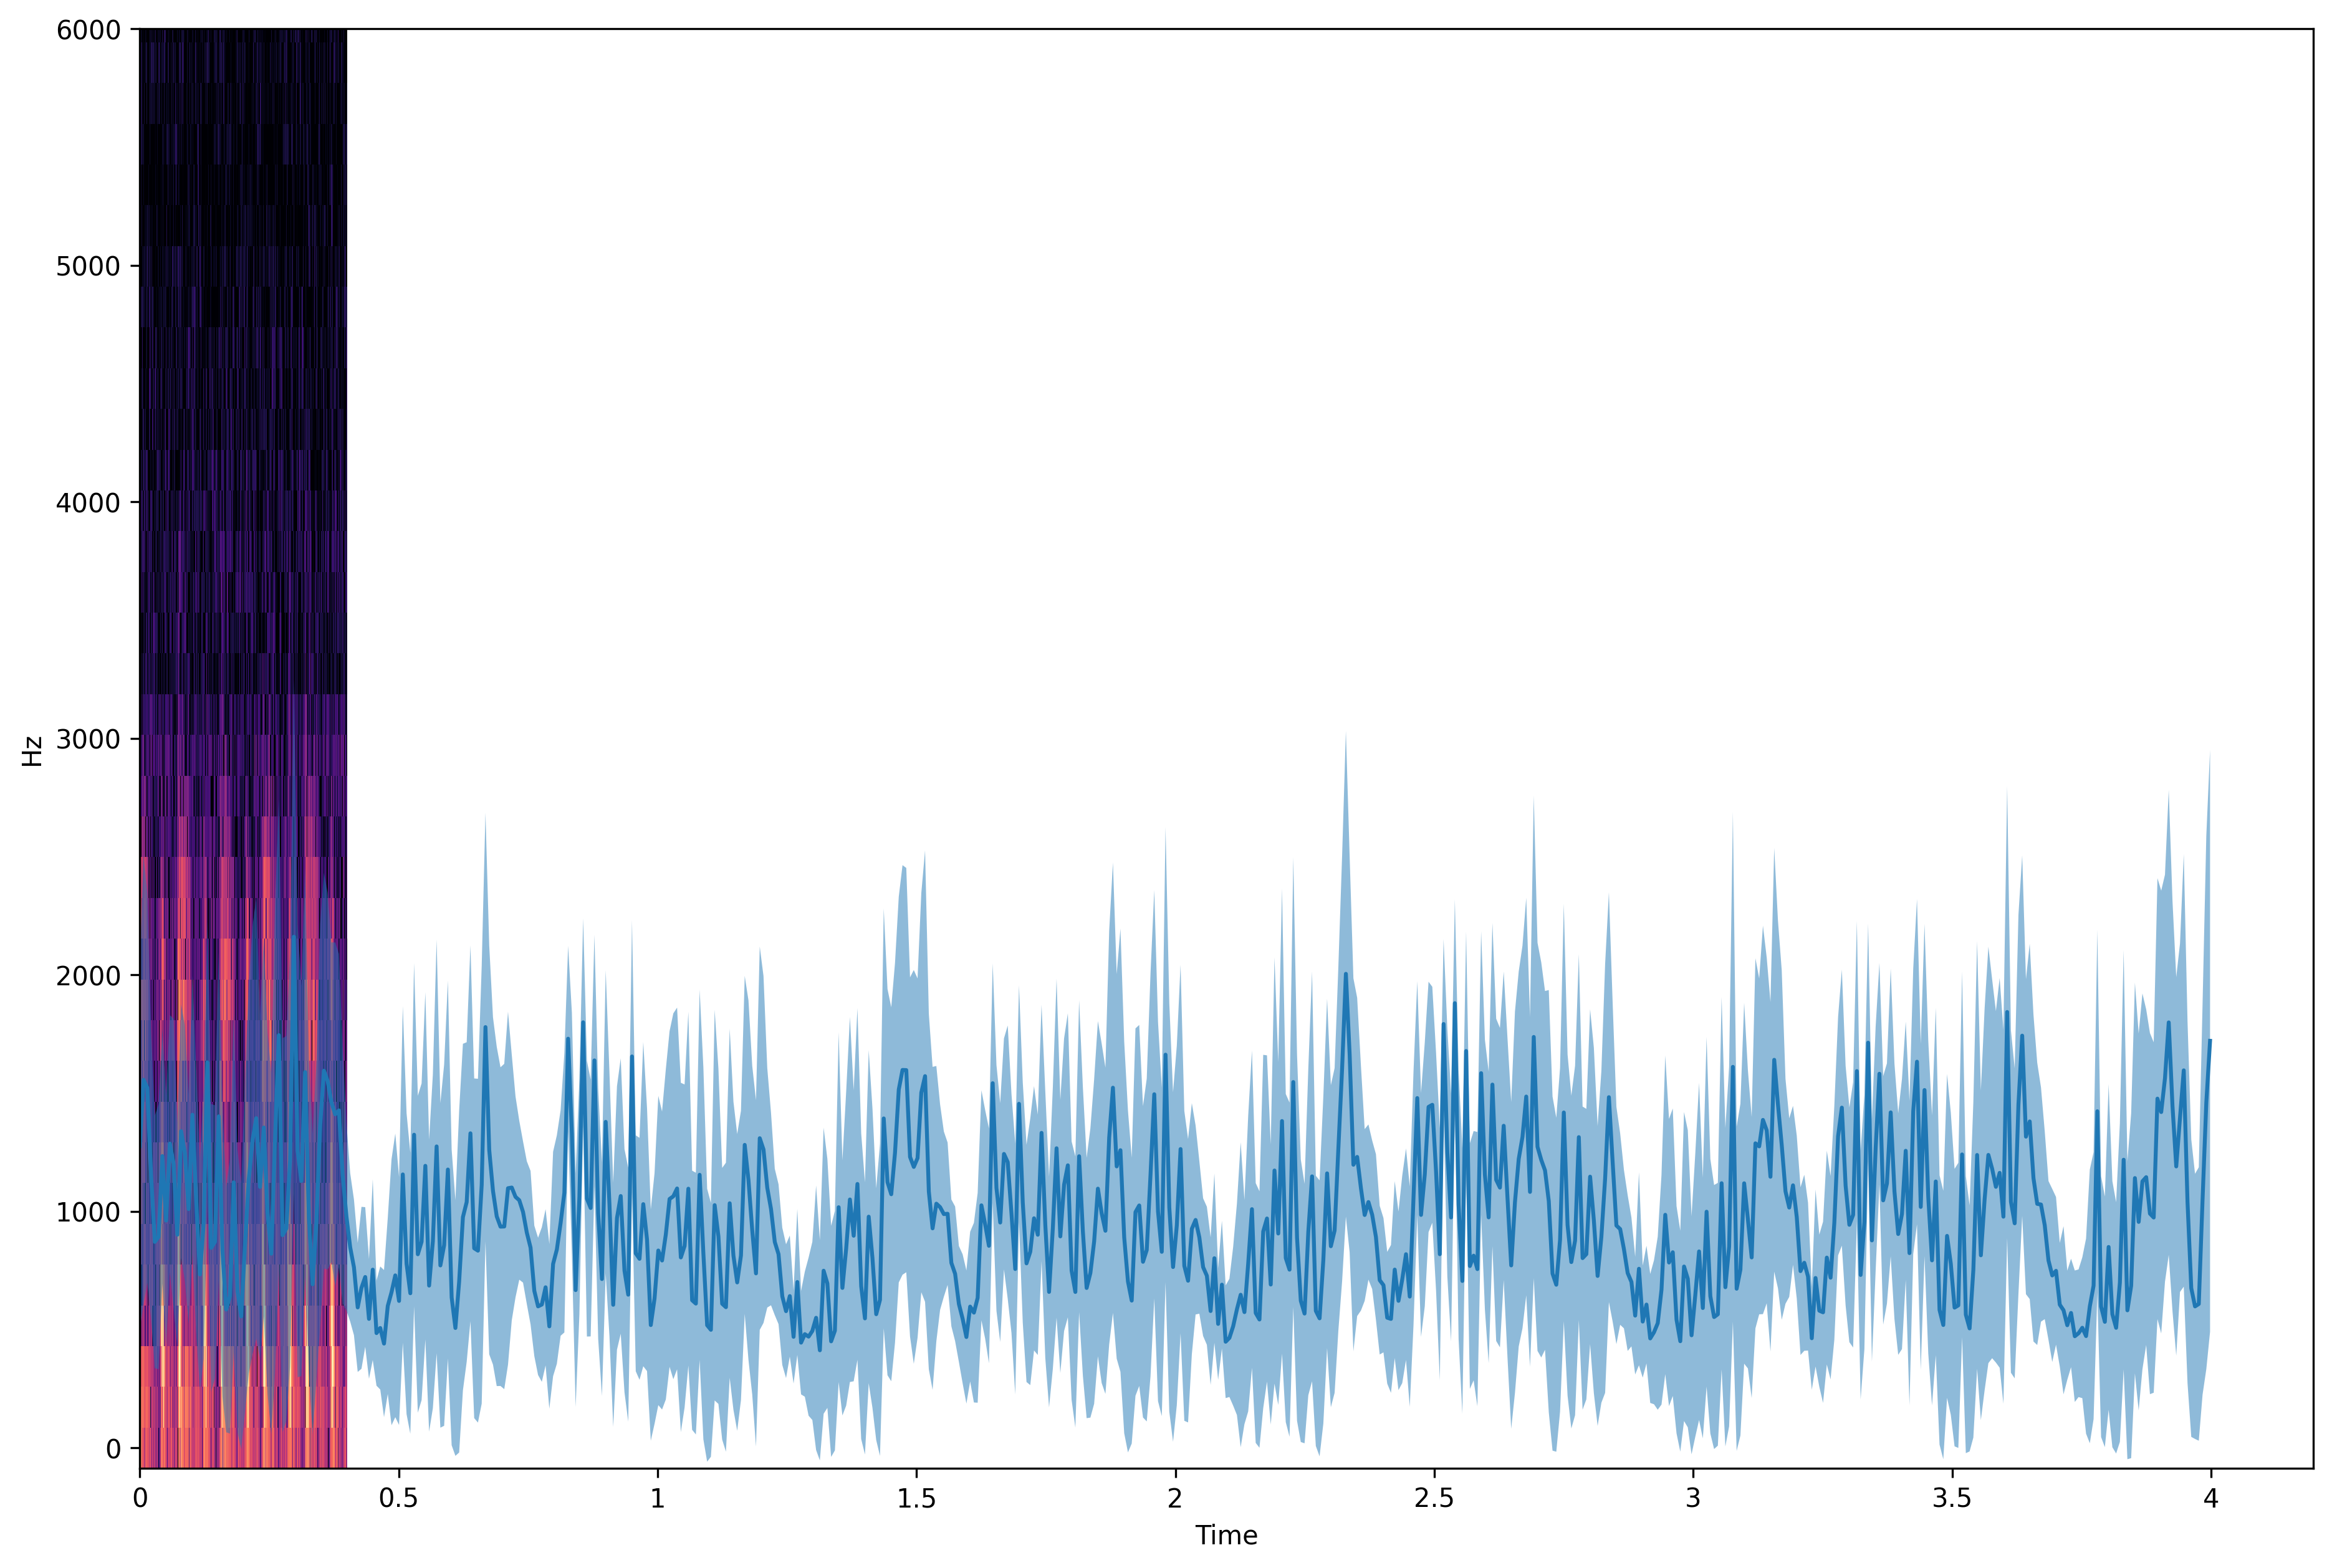

In [51]:
from librosa.core import amplitude_to_db
from librosa.display import specshow

# Convert spectrogram to decibels for visualization
spec_db = amplitude_to_db(spec)

# Display these features on top of the spectrogram
fig, ax = plt.subplots(figsize=(15, 10))

specshow(spec_db, ax = ax, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
ax.plot(times_spec, centroids)
ax.fill_between(times_spec, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
ax.set(ylim=[None, 6000])
plt.show()


As you can see, the spectral centroid and bandwidth characterize the spectral content in each sound over time. They give us a summary of the spectral content that we can use in a classifier

 Combine all of them into an array that can be fed into the classifier

In [55]:
# Import the stft function
from librosa.core import stft
import librosa as lr

# Prepare the STFT
HOP_LENGTH = 2**4
SIZE_WINDOW = 2**7

path = 'audio_munged.hdf5'
key_data = pd.read_hdf(path, key='h5io/key_data')
cols_list = [col_values.to_numpy() for _, col_values in key_data.items()]


def mySTFT(col_data, H_L =HOP_LENGTH, S_Z = SIZE_WINDOW):
    col_spec = stft(col_data, hop_length= H_L, n_fft= S_Z)
    return np.abs(col_spec.astype(np.float32))

# mySTFT(cols_list[0])

spectrograms = [ mySTFT(col) for col in cols_list]
spectrograms[0].shape

/tmp/ipython-input-466902751.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.abs(col_spec.astype(np.float32))


(65, 552)

In [56]:
# Loop through each spectrogram
bandwidths = []
centroids = []

for spec in spectrograms:
    # Calculate the mean spectral bandwidth
    this_mean_bandwidth = np.mean(lr.feature.spectral_bandwidth(S=spec))
    # Calculate the mean spectral centroid
    this_mean_centroid = np.mean(lr.feature.spectral_centroid(S=spec))
    # Collect the values
    bandwidths.append(this_mean_bandwidth)
    centroids.append(this_mean_centroid)

In [59]:
# Prepare for the next exercise
path = 'audio_munged.hdf5'
df = pd.read_hdf(path, key='h5io/key_data')
audio = df.squeeze()

key_meta = pd.read_hdf(path, key='h5io/key_meta')
labels = key_meta["label"].to_numpy()

# Smooth by applying a rolling mean
audio_rectified = audio.apply(np.abs)
audio_rectified_smooth = audio_rectified.rolling(50).mean()

# Calculate stats
means = np.mean(audio_rectified_smooth, axis=0)
stds = np.std(audio_rectified_smooth, axis=0)
maxs = np.max(audio_rectified_smooth, axis=0)

# Calculate the tempo of the sounds
tempos = []
for col, i_audio in audio.items():
    try:
        tempo, _ = lr.beat.beat_track(y=i_audio.values, sr=sfreq, hop_length=2**6)
        tempos.append(tempo)
    except ValueError as e:
        if "Tempo estimation requires non-silent audio" in str(e):
            print(f"Warning: Silent audio clip encountered at column {col}. Assigning tempo as 0.")
            tempos.append(0)
        else:
            raise e


# Convert the list to an array so you can manipulate it more easily
tempos = np.array(tempos)

# Calculate statistics of each tempo
tempos_mean = tempos.mean(axis=-1)
tempos_std = tempos.std(axis=-1)
tempos_max = tempos.max(axis=-1)


from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
model = LinearSVC()

In [60]:
# Create X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_max, tempos_std, bandwidths, centroids])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

0.75


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [61]:
labels = np.array(['normal', 'normal', 'normal', 'murmur', 'normal', 'normal',
       'normal', 'murmur', 'normal', 'murmur', 'normal', 'normal',
       'normal', 'murmur', 'murmur', 'normal', 'normal', 'murmur',
       'murmur', 'normal', 'murmur', 'murmur', 'murmur', 'murmur',
       'normal', 'normal', 'murmur', 'normal', 'normal', 'murmur',
       'murmur', 'murmur', 'murmur', 'murmur', 'murmur', 'normal',
       'normal', 'murmur', 'murmur', 'murmur', 'normal', 'murmur',
       'murmur', 'normal', 'normal', 'normal', 'murmur', 'murmur',
       'murmur', 'normal', 'normal', 'normal', 'normal', 'murmur',
       'normal', 'normal', 'murmur', 'murmur', 'murmur', 'murmur'],
      dtype=object)

In [62]:
model3 = LinearSVC()

# Create X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_max, tempos_std, bandwidths, centroids])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
percent_score = cross_val_score(model3, X, y, cv=5)
print(np.mean(percent_score))


0.55


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

We calculated many different features of the audio, and combined each of them under the assumption that they provide independent information that can be used in classification. We noticed that the accuracy of your models varied a lot when using different set of features.